# AoC 2021 day 25
## Part 1
Sounds completely straightforward. Incidentally, this is called the [Biham-Middleton-Levine trafic model](https://en.wikipedia.org/wiki/Biham%E2%80%93Middleton%E2%80%93Levine_traffic_model) and in the number of critters is hgh enough it will always jam.

The only problem is, that we may possibly need a large number of moves until everything is blocked, so we should be careful to be efficient. There are two basic ideas: one is to keep the data as a 2-dim array, but they we have to scan the whole array to find candidates for movement. Another idea is to keep two lists of critters "east-movers" and "south-movers", but then it would take a while to scan the lists and find if a given spot is free. Unless we use a set as the structure to keep occupied slots. Checking if a location is in a set uses hashes, so it should be fast.

The `readdata` function, as usual, reads input from a file and produces two lists `easts` and `souths`, and also the sizes of the ocean floor in both directions. Function `makemap` is for visualisation only, to compare the map with expectation.

In [1]:
import numpy as np

In [2]:
def readdata(file):
    easts = []
    souths = []
    nline = 0
    for line in open(file,"rt"):
        nchar = 0
        for c in line.strip():
            if c == '>':
                easts.append((nchar,nline))
            elif c== 'v':
                souths.append((nchar,nline))
            nchar += 1
        nline += 1
    return easts,souths,nchar,nline
def makemap(easts,souths,sizex,sizey):
    floor = np.zeros((sizey,sizex),int)
    for x,y in easts:
        floor[y,x] = 1
    for x,y in souths:
        floor[y,x] = 2
    return floor

In [3]:
te,ts,tsizex,tsizey = readdata("test.txt")
te

[(4, 0),
 (5, 0),
 (9, 0),
 (3, 1),
 (4, 1),
 (0, 2),
 (1, 2),
 (3, 2),
 (5, 2),
 (0, 3),
 (1, 3),
 (3, 3),
 (4, 3),
 (6, 3),
 (1, 4),
 (0, 5),
 (2, 5),
 (3, 5),
 (5, 6),
 (7, 6),
 (5, 7),
 (6, 7),
 (9, 8)]

In [4]:
tmap = makemap(te,ts,tsizex,tsizey)
tmap

array([[2, 0, 0, 0, 1, 1, 0, 2, 2, 1],
       [0, 2, 2, 1, 1, 0, 2, 2, 0, 0],
       [1, 1, 0, 1, 2, 1, 0, 0, 0, 2],
       [1, 1, 2, 1, 1, 0, 1, 0, 2, 0],
       [2, 1, 2, 0, 2, 2, 0, 2, 0, 0],
       [1, 0, 1, 1, 0, 0, 2, 0, 0, 0],
       [0, 2, 2, 0, 0, 1, 0, 1, 2, 0],
       [2, 0, 2, 0, 0, 1, 1, 2, 0, 2],
       [0, 0, 0, 0, 2, 0, 0, 2, 0, 1]])

The following function makes a single game turn. It moves first east-movers and then south-movers. Remember to update the list of occupied slots, between moving easts and souths. The function returns the number of critters that have moved this turn, and updates both lists in place.

In [5]:
def turn(easts,souths,sizex,sizey):
    nmove = 0
    occupied = set(easts+souths)
    for i in range(len(easts)):
        x,y = easts[i]
        nextx = (x+1) % sizex
        if (nextx,y) not in occupied:
            nmove += 1
            easts[i] = (nextx,y)
    occupied = set(easts+souths)
    for i in range(len(souths)):
        x,y = souths[i]
        nexty = (y+1) % sizey
        if (x,nexty) not in occupied:
            nmove += 1
            souths[i] = (x,nexty)
    return nmove

Try on the test data set, if everything looks good after the first turn, assume it works.

In [6]:
turn(te,ts,tsizex,tsizey)

24

In [7]:
te

[(4, 0),
 (6, 0),
 (9, 0),
 (3, 1),
 (5, 1),
 (0, 2),
 (2, 2),
 (3, 2),
 (6, 2),
 (0, 3),
 (1, 3),
 (3, 3),
 (5, 3),
 (7, 3),
 (1, 4),
 (1, 5),
 (2, 5),
 (4, 5),
 (6, 6),
 (7, 6),
 (5, 7),
 (6, 7),
 (0, 8)]

In [8]:
makemap(te,ts,tsizex,tsizey)

array([[0, 0, 0, 0, 1, 0, 1, 2, 0, 1],
       [2, 0, 2, 1, 0, 1, 2, 0, 2, 0],
       [1, 2, 1, 1, 0, 0, 1, 2, 0, 0],
       [1, 1, 2, 1, 2, 1, 0, 1, 0, 2],
       [0, 1, 2, 0, 2, 0, 0, 0, 2, 0],
       [2, 1, 1, 0, 1, 2, 2, 2, 0, 0],
       [0, 0, 2, 0, 0, 0, 1, 1, 0, 0],
       [2, 2, 0, 0, 0, 1, 1, 2, 2, 0],
       [1, 0, 2, 0, 2, 0, 0, 2, 0, 2]])

Now solution of part 1 is easy: just keep making turns, until nothing moves any more. return the number of turns made.

In [9]:
def part1(easts,souths,sizex,sizey):
    nturn = 0
    nmove = 1
    while nmove>0:
        nmove = turn(easts,souths,sizex,sizey)
        nturn += 1
    return nturn

Read the test data again, because the lists of critters have been modified.

In [10]:
te,ts,tsizex,tsizey = readdata("test.txt")
part1(te,ts,tsizex,tsizey)

58

In [11]:
ce,cs,csizex,csizey = readdata("input.txt")

In [12]:
part1(ce,cs,csizex,csizey)

471

And that's it. Thanks everyone, it was fun this year, even if too often second parts of the puzzles were too easy to guess.

But... it appears I can't live without the second part! Thus:
## Part 1 v2
Or try if the solution with map (as an array) would be faster than the solution with lists above. Read the input file into an int array, with 0 meaning free spot, 1 for east moving critter and 2 for south moving critter. Due to the way NumPy arranges arrays, south-moves actually move in `x` and east-movers in `y`.

In [13]:
def readdata2(file):
    lmap = []
    for line in open(file):
        cmap = []
        for c in line.strip():
            if c=='>':
                cmap.append(1)
            elif c == 'v':
                cmap.append(2)
            else:
                cmap.append(0)
        lmap.append(cmap)
    return np.array(lmap,dtype=int)

In [14]:
tmap2 = readdata2("test.txt")
tmap2

array([[2, 0, 0, 0, 1, 1, 0, 2, 2, 1],
       [0, 2, 2, 1, 1, 0, 2, 2, 0, 0],
       [1, 1, 0, 1, 2, 1, 0, 0, 0, 2],
       [1, 1, 2, 1, 1, 0, 1, 0, 2, 0],
       [2, 1, 2, 0, 2, 2, 0, 2, 0, 0],
       [1, 0, 1, 1, 0, 0, 2, 0, 0, 0],
       [0, 2, 2, 0, 0, 1, 0, 1, 2, 0],
       [2, 0, 2, 0, 0, 1, 1, 2, 0, 2],
       [0, 0, 0, 0, 2, 0, 0, 2, 0, 1]])

In [15]:
tmap2.shape

(9, 10)

Now a single turn function. It uses a nested function to make a half-move, the nested functions takes another argument telling it which critters to move. Have to make a copy of the original array and update it, because we must keep the map of previously occupied slots during a half-move. The function returns a flag indicating if any movement happened this turn, and the new map.

In [16]:
def turn2(mapa):
    sizex,sizey = mapa.shape
    def move(mapa,who):
        newmap = mapa.copy()
        moved = False
        it = np.nditer(mapa, flags=['multi_index'])
        for loc in it:
            if loc == who:
                x,y = it.multi_index
                if who==1:
                    newx = x
                    newy = (y+1) % sizey
                else:
                    newy = y
                    newx = (x+1) % sizex
                if mapa[newx, newy] == 0:
                    newmap[newx,newy] = who
                    newmap[x,y] = 0
                    moved = True
        return moved,newmap
    me,mapa = move(mapa,1)
    ms,mapa = move(mapa,2)
    return ms or me, mapa
            

As before, make a single turn on test data to check

In [17]:
turn2(tmap2)

(True,
 array([[0, 0, 0, 0, 1, 0, 1, 2, 0, 1],
        [2, 0, 2, 1, 0, 1, 2, 0, 2, 0],
        [1, 2, 1, 1, 0, 0, 1, 2, 0, 0],
        [1, 1, 2, 1, 2, 1, 0, 1, 0, 2],
        [0, 1, 2, 0, 2, 0, 0, 0, 2, 0],
        [2, 1, 1, 0, 1, 2, 2, 2, 0, 0],
        [0, 0, 2, 0, 0, 0, 1, 1, 0, 0],
        [2, 2, 0, 0, 0, 1, 1, 2, 2, 0],
        [1, 0, 2, 0, 2, 0, 0, 2, 0, 2]]))

And the solution:

In [18]:
def part1v2(mapa):
    nturn = 0
    moved = True
    while moved:
        moved,mapa = turn2(mapa)
        nturn += 1
    return nturn

In [19]:
tmap2 = readdata2("test.txt")
part1v2(tmap2)

58

In [20]:
cmap2 = readdata2("input.txt")
part1v2(cmap2)

471

This took visibly longer. Measure it.

In [21]:
import time

In [22]:
cmap2=readdata2("input.txt")
t = time.time()
print(part1v2(cmap2))
time.time() - t

471


36.012059926986694

In [23]:
ce,cs,csizex,csizey = readdata("input.txt")
t = time.time()
print(part1(ce,cs,csizex,csizey))
time.time() - t

471


2.9551689624786377

The solution with map as an array is over ten times slower. It is probably scanning the entire array twice each turn that hurts us. Maybe we can speed this up letting NumPy do the scan? Use `np.where` to find indices where a given value appears in the map.

In [24]:
def turn2(mapa):
    sizex,sizey = mapa.shape
    def move(mapa,who):
        newmap = mapa.copy()
        moved = False
        locs = np.where(mapa==who)
        for x,y in zip(locs[0],locs[1]):
            if who==1:
                newx = x
                newy = (y+1) % sizey
            else:
                newy = y
                newx = (x+1) % sizex
            if mapa[newx, newy] == 0:
                newmap[newx,newy] = who
                newmap[x,y] = 0
                moved = True
        return moved,newmap
    me,mapa = move(mapa,1)
    ms,mapa = move(mapa,2)
    return ms or me, mapa
            

Usual test, then run with timer.

In [25]:
tmap2 = readdata2("test.txt")
turn2(tmap2)

(True,
 array([[0, 0, 0, 0, 1, 0, 1, 2, 0, 1],
        [2, 0, 2, 1, 0, 1, 2, 0, 2, 0],
        [1, 2, 1, 1, 0, 0, 1, 2, 0, 0],
        [1, 1, 2, 1, 2, 1, 0, 1, 0, 2],
        [0, 1, 2, 0, 2, 0, 0, 0, 2, 0],
        [2, 1, 1, 0, 1, 2, 2, 2, 0, 0],
        [0, 0, 2, 0, 0, 0, 1, 1, 0, 0],
        [2, 2, 0, 0, 0, 1, 1, 2, 2, 0],
        [1, 0, 2, 0, 2, 0, 0, 2, 0, 2]]))

In [26]:
tmap2 = readdata2("test.txt")
part1v2(tmap2)

58

In [27]:
cmap2=readdata2("input.txt")
t = time.time()
print(part1v2(cmap2))
time.time() - t

471


6.792388439178467

Much better, but still slower than the list solution. We also copy the entire array twice each turn, it may contribute to the slowdown as well. This could be averted by building first a list of critters to move without updating the map, and then do the updates based on that list. This is left as an exercise to the reader. 

## For fun
What does the fully jammed phase look like? The east-goers are colored red and south-goers blue in this picture

In [28]:
import matplotlib.pyplot as plt

This is the initial state:

139 137


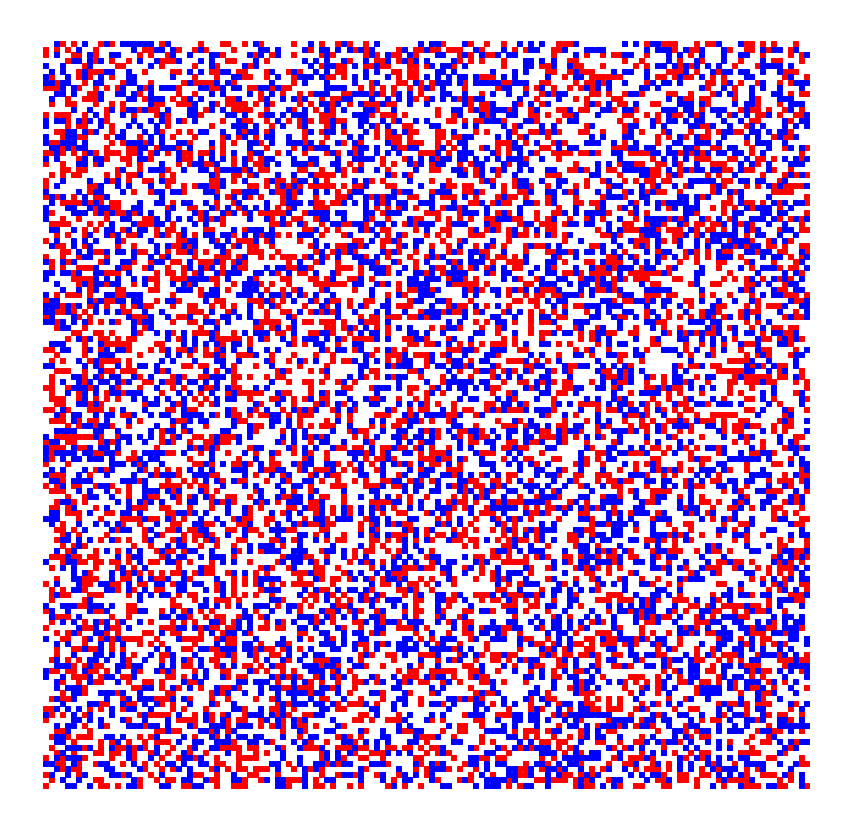

In [29]:
ce,cs,csizex,csizey = readdata("input.txt")
print(csizex,csizey)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.plot([x[0] for x in ce],[-x[1] for x in ce],"sr",[x[0] for x in cs],[-x[1] for x in cs],"sb",markersize=5)

And that what it looks like after all movement stopped.

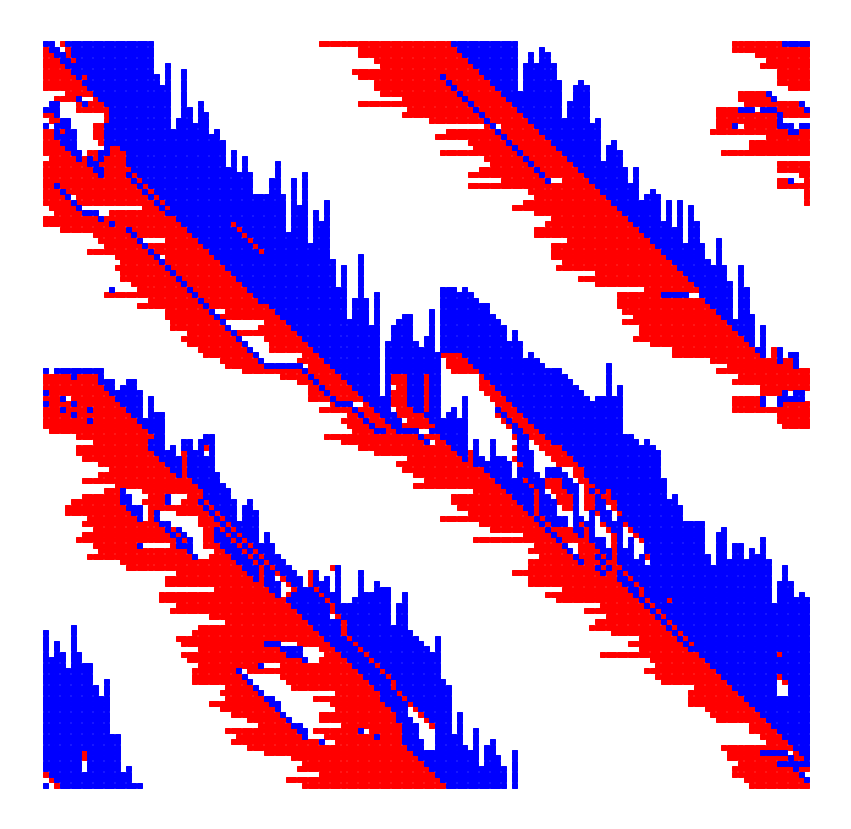

In [30]:
nturn = 0
nmove = 1
while nmove>0:
    nmove = turn(ce,cs,csizex,csizey)
    nturn += 1
plt.figure(figsize=(15,15))
plt.axis('off')
plt.plot([x[0] for x in ce],[-x[1] for x in ce],"sr",[x[0] for x in cs],[-x[1] for x in cs],"sb",markersize=5)